In [1]:
import numpy as np

In [2]:
import tensorflow as tf
tf.__version__

'2.4.1'

In [3]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [4]:
gpus= tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(gpus[0], True)

# CIFAR-10 Multiple Classes

Let's go over another example of using Keras and building out CNNs. This time will use another famous data set, the CIFAR-10 dataset which consists of 10 different image types.

-----

# The Data

CIFAR-10 is a dataset of 50,000 32x32 color training images, labeled over 10 categories, and 10,000 test images.

In [6]:
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [7]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3), (50000, 1), (10000, 1))

In [8]:
x_train[0].shape

(32, 32, 3)

In [9]:
import matplotlib.pyplot as plt

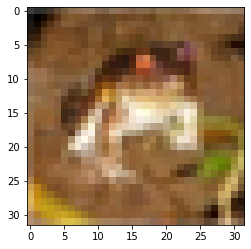

In [10]:
# FROG
plt.imshow(x_train[0])

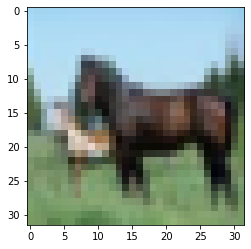

In [11]:
# HORSE
plt.imshow(x_train[12])

# PreProcessing

In [12]:
# x_train[0]

In [16]:
x_train[0].shape , x_train[0].max(), x_train[0].min()

((32, 32, 3), 255, 0)

In [17]:
x_train = x_train/225

In [18]:
x_test = x_test/255

In [19]:
x_train.shape

(50000, 32, 32, 3)

In [20]:
x_test.shape

(10000, 32, 32, 3)

## Labels

In [21]:
from tensorflow.keras.utils import to_categorical

In [22]:
y_train.shape

(50000, 1)

In [23]:
y_train[0]

array([6], dtype=uint8)

In [24]:
y_cat_train = to_categorical(y_train,10)

In [25]:
y_cat_train.shape

(50000, 10)

In [26]:
y_cat_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [27]:
y_cat_test = to_categorical(y_test,10)

----------
# Building the Model

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [ ]:
tf.keras.backend.clear_session()

In [29]:
model = Sequential()

## FIRST SET OF LAYERS

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

## SECOND SET OF LAYERS

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu'))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

# FLATTEN IMAGES FROM 28 by 28 to 764 BEFORE FINAL LAYER
model.add(Flatten())

# 256 NEURONS IN DENSE HIDDEN LAYER (YOU CAN CHANGE THIS NUMBER OF NEURONS)
model.add(Dense(256, activation='relu'))

# LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES
model.add(Dense(10, activation='softmax'))


model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 29, 29, 32)        1568      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        16416     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               205056    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2

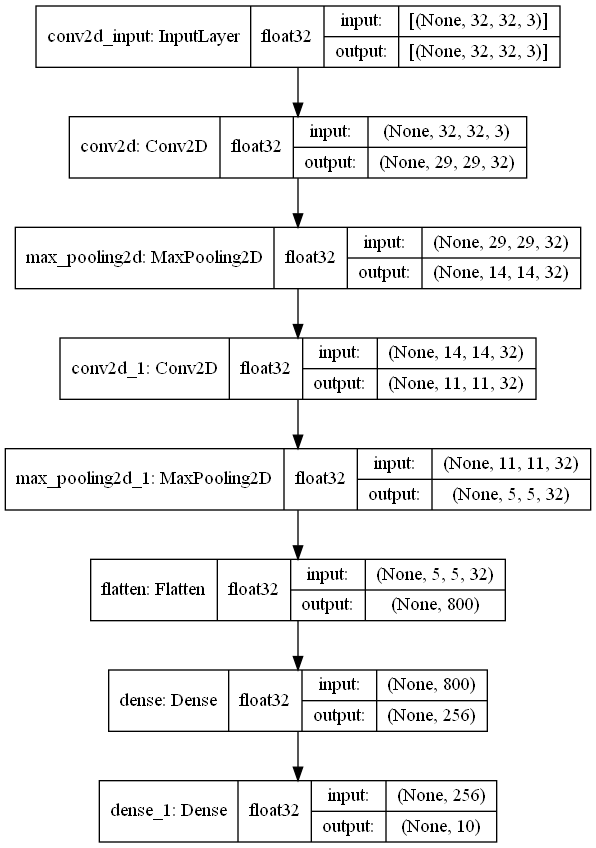

In [31]:
tf.keras.utils.plot_model(model, to_file='model_3_cifar10.png', show_shapes=True, show_layer_names=True, show_dtype=True)

In [32]:
history = model.fit(x_train, y_cat_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 9s 5ms/step - loss: 1.7136 - accuracy: 0.3730
Epoch 2/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.2107 - accuracy: 0.5713
Epoch 3/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.0385 - accuracy: 0.6376
Epoch 4/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9200 - accuracy: 0.6766
Epoch 5/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8269 - accuracy: 0.7108
Epoch 6/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7561 - accuracy: 0.7381
Epoch 7/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.6877 - accuracy: 0.7587
Epoch 8/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.6222 - accuracy: 0.7825
Epoch 9/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.5507 - accuracy: 0.8072
Epoch 10/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.502

In [33]:
# Careful, don't overwrite our file!
model.save('model_3_cifar10.h5')

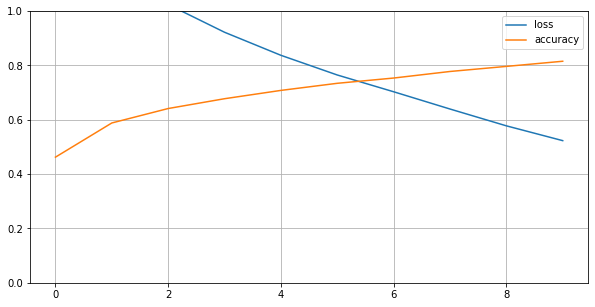

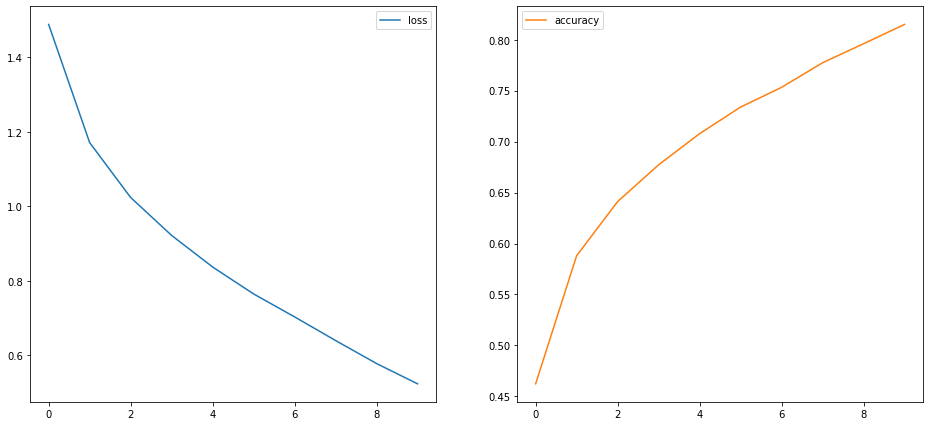

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(10, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
pd.DataFrame(history.history).plot(figsize=(16, 16), layout=(2,2), subplots=True)
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [35]:
model.metrics_names

['loss', 'accuracy']

In [36]:
model.evaluate(x_test,y_cat_test)

313/313 [==============================] - 1s 4ms/step - loss: 1.0753 - accuracy: 0.6659


[1.0752619504928589, 0.6658999919891357]

In [37]:
from sklearn.metrics import classification_report

predictions = model.predict_classes(x_test)

C:\Program Files\Python38\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [38]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.72      0.72      0.72      1000
           1       0.81      0.77      0.79      1000
           2       0.51      0.60      0.55      1000
           3       0.47      0.54      0.50      1000
           4       0.54      0.74      0.62      1000
           5       0.61      0.52      0.57      1000
           6       0.72      0.77      0.75      1000
           7       0.85      0.59      0.70      1000
           8       0.78      0.78      0.78      1000
           9       0.82      0.64      0.72      1000

    accuracy                           0.67     10000
   macro avg       0.68      0.67      0.67     10000
weighted avg       0.68      0.67      0.67     10000



In [ ]:
from tensorflow.keras.models import load_model

newmodel = load_model('model_3_cifar10.h5')

## Optional: Large Model

In [39]:
tf.keras.backend.clear_session()

In [40]:
model = Sequential()

## FIRST SET OF LAYERS

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))
# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))

# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

## SECOND SET OF LAYERS

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=64, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))
# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=64, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))

# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

# FLATTEN IMAGES FROM 28 by 28 to 764 BEFORE FINAL LAYER
model.add(Flatten())

# 512 NEURONS IN DENSE HIDDEN LAYER (YOU CAN CHANGE THIS NUMBER OF NEURONS)
model.add(Dense(512, activation='relu'))

# LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES
model.add(Dense(10, activation='softmax'))


model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [41]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 29, 29, 32)        1568      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 26, 26, 32)        16416     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 64)        32832     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 64)          65600     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 576)               0

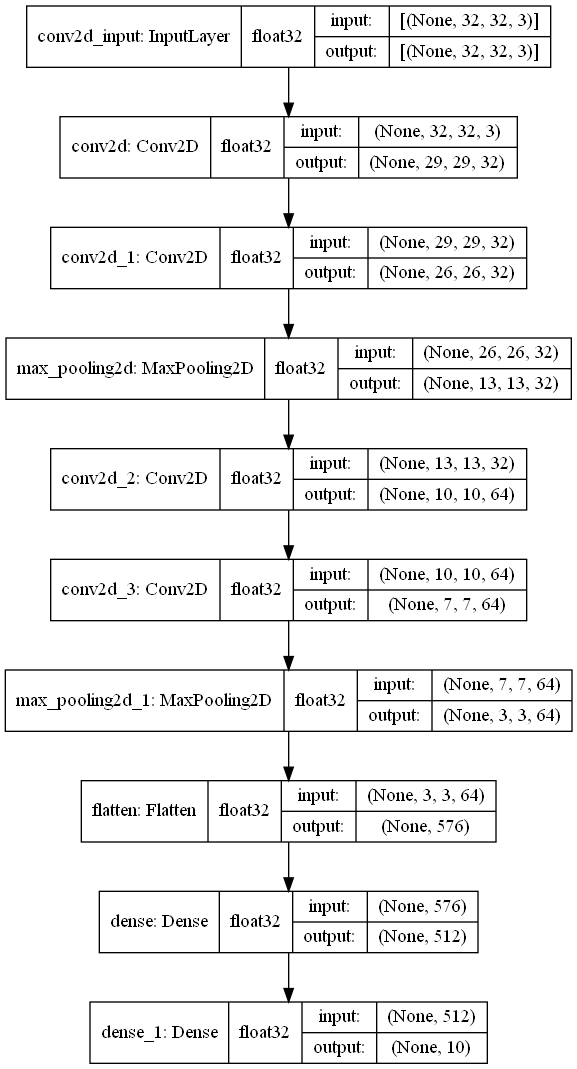

In [42]:
tf.keras.utils.plot_model(model, to_file='model_3_larger_cifar10.png', show_shapes=True, show_layer_names=True, show_dtype=True)

In [43]:
history = model.fit(x_train, y_cat_train, epochs=20)

Epoch 1/20
1563/1563 [==============================] - 13s 8ms/step - loss: 1.7686 - accuracy: 0.3349
Epoch 2/20
1563/1563 [==============================] - 13s 8ms/step - loss: 1.1798 - accuracy: 0.5770
Epoch 3/20
1563/1563 [==============================] - 13s 8ms/step - loss: 0.9784 - accuracy: 0.6550
Epoch 4/20
1563/1563 [==============================] - 13s 8ms/step - loss: 0.8437 - accuracy: 0.7025
Epoch 5/20
1563/1563 [==============================] - 13s 8ms/step - loss: 0.7326 - accuracy: 0.7409
Epoch 6/20
1563/1563 [==============================] - 13s 8ms/step - loss: 0.6488 - accuracy: 0.7731
Epoch 7/20
1563/1563 [==============================] - 13s 8ms/step - loss: 0.5822 - accuracy: 0.7925
Epoch 8/20
1563/1563 [==============================] - 13s 8ms/step - loss: 0.5007 - accuracy: 0.8214
Epoch 9/20
1563/1563 [==============================] - 14s 9ms/step - loss: 0.4469 - accuracy: 0.8427
Epoch 10/20
1563/1563 [==============================] - 14s 9ms/step - l

In [44]:
model.save('model_3_larger_cifar10.h5')

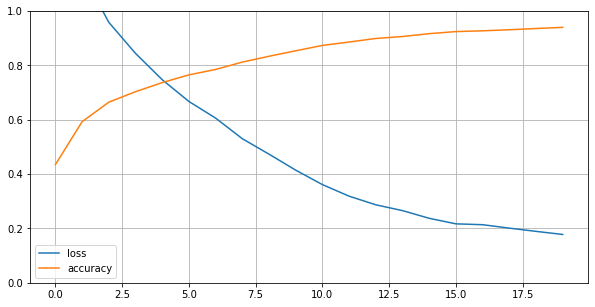

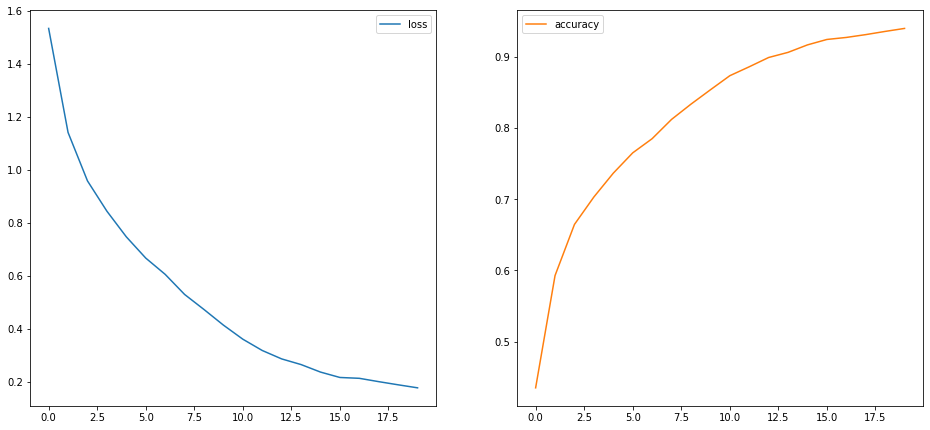

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(10, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
pd.DataFrame(history.history).plot(figsize=(16, 16), layout=(2,2), subplots=True)
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [46]:
model.evaluate(x_test,y_cat_test)

313/313 [==============================] - 1s 4ms/step - loss: 1.8941 - accuracy: 0.6768


[1.8941317796707153, 0.676800012588501]

In [47]:
from sklearn.metrics import classification_report

predictions = model.predict_classes(x_test)

C:\Program Files\Python38\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [48]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.76      0.65      0.70      1000
           1       0.85      0.81      0.82      1000
           2       0.57      0.54      0.55      1000
           3       0.46      0.57      0.51      1000
           4       0.59      0.63      0.61      1000
           5       0.65      0.52      0.58      1000
           6       0.66      0.81      0.73      1000
           7       0.79      0.67      0.73      1000
           8       0.81      0.74      0.77      1000
           9       0.75      0.82      0.78      1000

    accuracy                           0.68     10000
   macro avg       0.69      0.68      0.68     10000
weighted avg       0.69      0.68      0.68     10000



In [38]:
from tensorflow.keras.models import load_model

newmodel = load_model('model_3_larger_cifar10.h5')

___